In [27]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pl.read_csv("data/titanic.csv")
df.head(3)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""


In [13]:
df[0]

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""


In [14]:
(
    df
    .filter(
        pl.col("Pclass") == 1 # filter condition
    )
    .select("PassengerId", "Pclass")
    .head(3)
)

PassengerId,Pclass
i64,i64
2,1
4,1
7,1


In [15]:
(
    df.filter(
        pl.col("Parch").gt(pl.col("SibSp"))
    )
    .select("PassengerId", "Parch", "SibSp")
    .head(3)
)

PassengerId,Parch,SibSp
i64,i64,i64
9,2,0
14,5,1
26,5,1


In [16]:
(
    df.filter(
        Parch = 3, # only work for = operator
    )
    .select("PassengerId", "Parch", "SibSp")
    .head(3)
)

PassengerId,Parch,SibSp
i64,i64,i64
87,3,1
438,3,2
737,3,1


In [17]:
is_first_class = [True if el == 1 else False for el in df["Pclass"]]
(
    df.filter(
        is_first_class
    )
    .head(1)
)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""


In [18]:
(
    df.with_columns(
        less_30_bool = pl.col("Age") < 30
    )
    .filter(
        pl.col("less_30_bool") # ~ for negation
    )
    .select("Pclass", "Name", "Age")
    .head(1)
)

Pclass,Name,Age
i64,str,f64
3,"""Braund, Mr. Owen Harris""",22.0


In [19]:
df_pclass_dict = (
    df
    .partition_by("Pclass", as_dict=True)
)

In [20]:
df_pclass_dict.keys()

dict_keys([(3,), (1,), (2,)])

In [26]:
df.group_by(["Sex", "Survived"]).len().sort("len", descending=True)

Sex,Survived,len
str,i64,u32
"""male""",0,468
"""female""",1,233
"""male""",1,109
"""female""",0,81


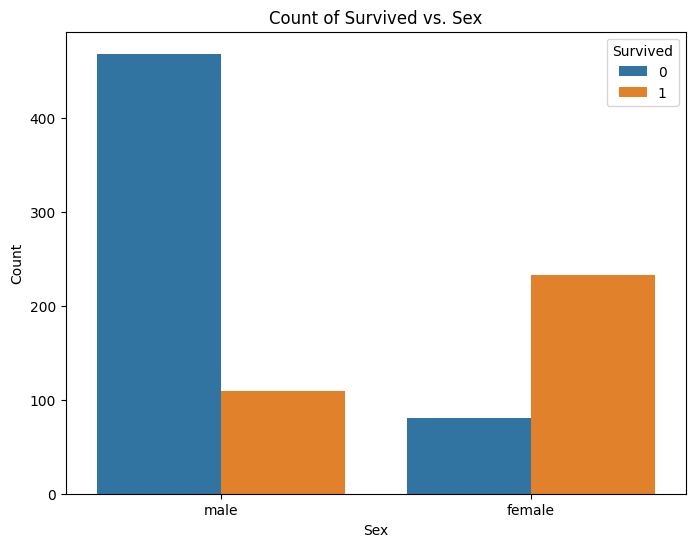

In [29]:
# Group by 'Sex' and 'Survived' and count occurrences
grouped_df = df.group_by(["Sex", "Survived"]).agg(pl.len().alias("count"))

# Convert to Pandas DataFrame for easier plotting
grouped_df_pandas = grouped_df.to_pandas()

# Plotting using Seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.barplot(x="Sex", y="count", hue="Survived", data=grouped_df_pandas)
plt.title("Count of Survived vs. Sex")
plt.ylabel("Count")
plt.show()